In [1]:
import numpy as np
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [18]:
PATH_TO_FILE = "yelp_academic_dataset_business"

In [27]:
#For loading .csv file
df = pd.read_csv(PATH_TO_FILE+".csv")

In [22]:
import pandas as pd
import json

with open(PATH_TO_FILE+".json") as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

df = pd.DataFrame(data)

In [120]:
nrow = df.shape[0]
attribute_ctr = {}
for col in df.columns:
    if 'attributes.' in col:
        name = col[11:]
        attribute_ctr[name] = nrow - df[col].isnull().values.ravel().sum()

In [252]:
df.attributes.iloc[6]

'{\'BusinessParking\': "{\'garage\': False, \'street\': False, \'validated\': False, \'lot\': False, \'valet\': False}", \'RestaurantsPriceRange2\': \'1\'}'

In [258]:
nrow - df['attributes'].isnull().values.ravel().sum()

162807

In [244]:
df.shape

(188593, 61)

('BusinessAcceptsCreditCards', 140391)
162807


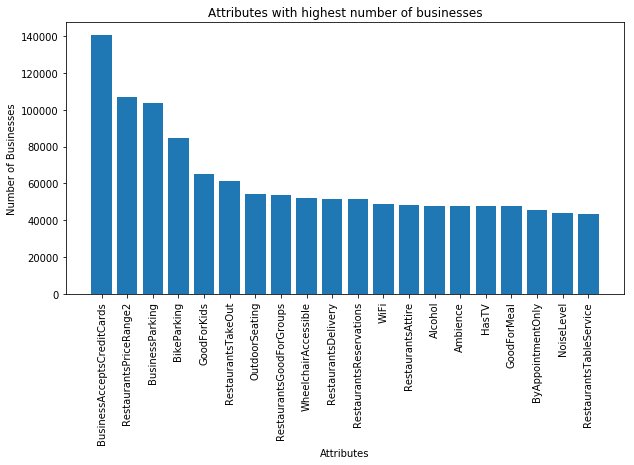

                             x       y
0   BusinessAcceptsCreditCards  140391
1       RestaurantsPriceRange2  107120
2              BusinessParking  103424
3                  BikeParking   84891
4                  GoodForKids   64931
5           RestaurantsTakeOut   61206
6               OutdoorSeating   54181
7     RestaurantsGoodForGroups   53839
8         WheelchairAccessible   52023
9          RestaurantsDelivery   51668
10     RestaurantsReservations   51363
11                        WiFi   49026
12           RestaurantsAttire   48182
13                     Alcohol   47892
14                    Ambience   47577
15                       HasTV   47533
16                 GoodForMeal   47483
17           ByAppointmentOnly   45423
18                  NoiseLevel   43710
19     RestaurantsTableService   43325


In [242]:
D = sorted(attribute_ctr.items(), key=lambda kv:kv[1], reverse = True)
print(D[0])
print(nrow - df['attributes'].isnull().values.ravel().sum())
attr_ctr_df = pd.DataFrame(D[:20], columns=['x','y'])
n = attr_ctr_df.sort_values('y',ascending=False)
plt.bar(np.arange(len(n)),n.y)
plt.xticks(np.arange(len(n)), n.x, rotation='vertical')
plt.xlabel('Attributes')
plt.ylabel('Number of Businesses')
plt.title('Attributes with highest number of businesses')
plt.savefig('Top 20 Attributes with highest number of businesses.png');
plt.show()
plt.close()
print(n)

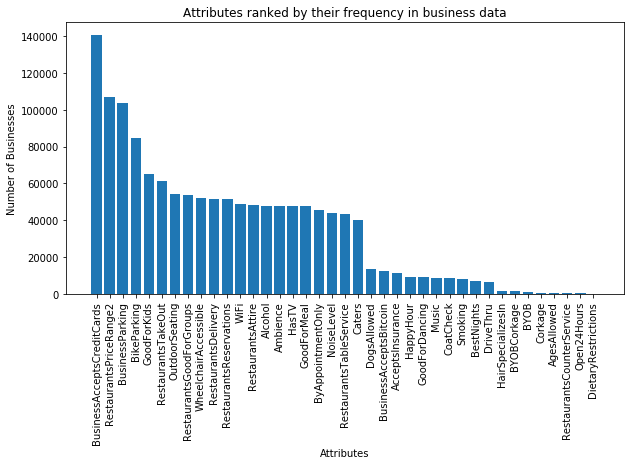

                             x       y
0   BusinessAcceptsCreditCards  140391
1       RestaurantsPriceRange2  107120
2              BusinessParking  103424
3                  BikeParking   84891
4                  GoodForKids   64931
5           RestaurantsTakeOut   61206
6               OutdoorSeating   54181
7     RestaurantsGoodForGroups   53839
8         WheelchairAccessible   52023
9          RestaurantsDelivery   51668
10     RestaurantsReservations   51363
11                        WiFi   49026
12           RestaurantsAttire   48182
13                     Alcohol   47892
14                    Ambience   47577
15                       HasTV   47533
16                 GoodForMeal   47483
17           ByAppointmentOnly   45423
18                  NoiseLevel   43710
19     RestaurantsTableService   43325
20                      Caters   40038
21                 DogsAllowed   13681
22      BusinessAcceptsBitcoin   12674
23            AcceptsInsurance   11671
24                   Happ

In [247]:
attr_ctr_df = pd.DataFrame(D, columns=['x','y'])
n = attr_ctr_df.sort_values('y',ascending=False)
plt.bar(np.arange(len(n)),n.y)
plt.xticks(np.arange(len(n)), n.x, rotation='vertical')
plt.xlabel('Attributes')
plt.ylabel('Number of Businesses')
plt.title('Attributes ranked by their frequency in business data')
plt.savefig('Attributes ranked by number of businesses.png',bbox_inches='tight');
plt.show()
plt.close()
print(n)

In [89]:
review_df = pd.read_csv("yelp_academic_dataset_review.csv")

In [106]:
df.categories = df.categories.str.strip('b')

In [268]:
categories_count = {}
def func(x):
    x = str(x).replace("'", "").replace('"', '')
    items = x.split(', ')
    for i in items:
        if i in categories_count.keys():
            categories_count[i] += 1
        else:
            categories_count[i] = 1
    
df.categories.apply(lambda x: func(x))

categories_count_df = sorted(categories_count.items(), key = lambda x: x[1], reverse=True)
categories_count_df = pd.DataFrame(categories_count_df, columns=['categories', 'count'])
print(categories_count_df.shape)
categories_count_df

(1306, 2)


,categories,count
0,Restaurants,57173
1,Shopping,30231
2,Food,27118
3,Beauty & Spas,18967
4,Home Services,18634
5,Health & Medical,16157
6,Local Services,12906
7,Automotive,12656
8,Nightlife,12438
9,Bars,10853


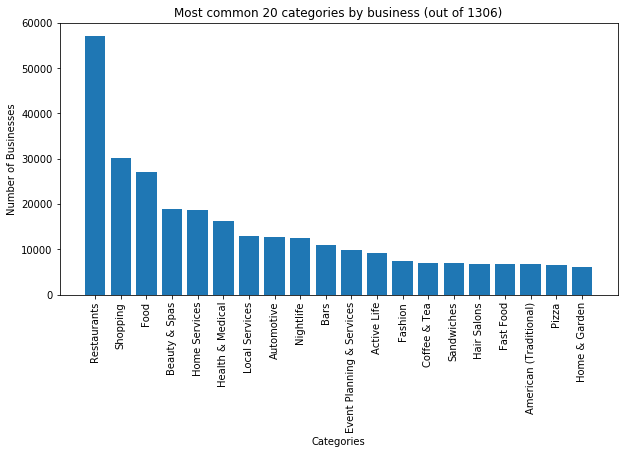

In [253]:
plt.bar(np.arange(20), categories_count_df['count'][:20])
plt.xticks(np.arange(20), categories_count_df['categories'][:20], rotation='vertical')
plt.title('Most common 20 categories by business (out of 1306)')
plt.xlabel('Categories')
plt.ylabel('Number of Businesses')
plt.savefig('Most common 20 categories by business.png',bbox_inches='tight');
plt.show()
plt.close()

In [220]:
top_n = 10
categories = list(categories_count_df[categories_count_df['count'] > 1000]['categories'])
top_cats = list(categories_count_df['categories'][:top_n])

two_combos = {}
for i in range(0, len(categories)):
    for j in range(i+1, len(categories)):
        if categories[i] in top_cats or categories[j] in top_cats:
            if categories[i] < categories[j]:
                combo_cat = categories[i] + " + " + categories[j]
            else:
                combo_cat = categories[j] + " + " + categories[i]
            if combo_cat not in two_combos:
                two_combos[combo_cat] = 0
print(len(two_combos))

1405


In [221]:
def joint_count(x):
    x = str(x).replace("'", "").replace('"', '')
    for k in two_combos.keys():
        cat1 = k.split(" + ")[0]
        cat2 = k.split(" + ")[1]
        if cat1 in x and cat2 in x:
            two_combos[k] += 1

df['categories'].apply(lambda x: joint_count(x))
print(two_combos)

{'Restaurants + Shopping': 445, 'Food + Restaurants': 18010, 'Beauty & Spas + Restaurants': 70, 'Home Services + Restaurants': 50, 'Health & Medical + Restaurants': 48, 'Local Services + Restaurants': 68, 'Automotive + Restaurants': 70, 'Nightlife + Restaurants': 7948, 'Bars + Restaurants': 10593, 'Event Planning & Services + Restaurants': 2247, 'Active Life + Restaurants': 234, 'Fashion + Restaurants': 46, 'Coffee & Tea + Restaurants': 3108, 'Restaurants + Sandwiches': 6912, 'Hair Salons + Restaurants': 24, 'Fast Food + Restaurants': 6812, 'American (Traditional) + Restaurants': 6659, 'Pizza + Restaurants': 6603, 'Home & Garden + Restaurants': 66, 'Auto Repair + Restaurants': 9, 'Hotels & Travel + Restaurants': 308, 'Arts & Entertainment + Restaurants': 816, 'Professional Services + Restaurants': 31, 'Doctors + Restaurants': 6, 'Real Estate + Restaurants': 17, 'Burgers + Restaurants': 5126, 'Breakfast & Brunch + Restaurants': 5023, 'Nail Salons + Restaurants': 11, 'Fitness & Instructi

In [222]:
two_combos_sorted = sorted(two_combos.items(), key = lambda x: x[1], reverse=True)
print(two_combos_sorted)

[('Food + Restaurants', 18010), ('Bars + Nightlife', 10880), ('Bars + Restaurants', 10593), ('Nightlife + Restaurants', 7948), ('Fashion + Shopping', 7406), ('Coffee & Tea + Food', 6940), ('Restaurants + Sandwiches', 6912), ('Beauty & Spas + Hair Salons', 6825), ('Fast Food + Restaurants', 6812), ('Fast Food + Food', 6812), ('American (Traditional) + Restaurants', 6659), ('Pizza + Restaurants', 6603), ('Home & Garden + Shopping', 6020), ('Auto Repair + Automotive', 5877), ('Doctors + Health & Medical', 5450), ('Home Services + Real Estate', 5295), ('Burgers + Restaurants', 5126), ('Breakfast & Brunch + Restaurants', 5023), ('Beauty & Spas + Nail Salons', 4839), ('Italian + Restaurants', 4550), ('Mexican + Restaurants', 4428), ('Food + Specialty Food', 4304), ('Chinese + Restaurants', 4247), ('American (New) + Restaurants', 4230), ('Beauty & Spas + Hair Removal', 3766), ('Local Services + Shopping', 3738), ('Food + Sandwiches', 3643), ('Bars + Food', 3573), ('Bakeries + Food', 3509), ('

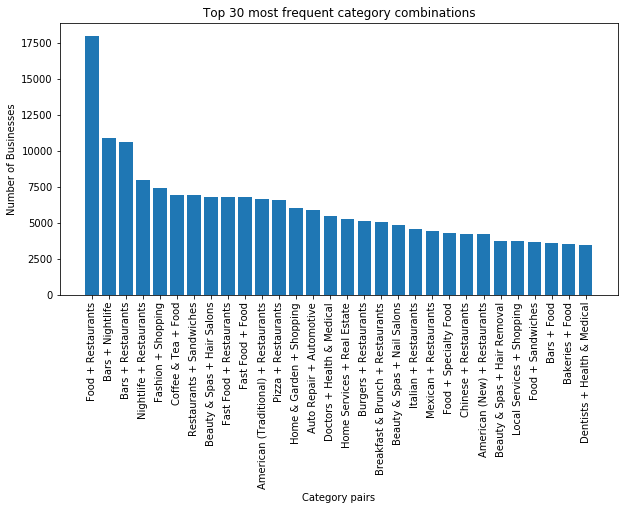

In [275]:
top_n = 30
two_combos_sorted_df = pd.DataFrame(two_combos_sorted, columns=['category_combination','ctr'])
plt.bar(np.arange(top_n),two_combos_sorted_df[:top_n].ctr)
plt.xticks(np.arange(top_n), two_combos_sorted_df[:top_n].category_combination, rotation='vertical')
plt.title('Top ' + str(top_n) + ' most frequent category combinations')
plt.xlabel('Category pairs')
plt.ylabel('Number of Businesses')
plt.savefig('top 20 category combo by business.png',bbox_inches='tight');
plt.show()
plt.close()

In [278]:
two_combos_sorted_df.head(20)

,category_combination,ctr
0,Food + Restaurants,18010
1,Bars + Nightlife,10880
2,Bars + Restaurants,10593
3,Nightlife + Restaurants,7948
4,Fashion + Shopping,7406
5,Coffee & Tea + Food,6940
6,Restaurants + Sandwiches,6912
7,Beauty & Spas + Hair Salons,6825
8,Fast Food + Restaurants,6812
9,Fast Food + Food,6812


In [205]:
top_n = 20
top_categories = list(categories_count_df.categories[:top_n])

top_categories_rc = {}
for c in top_categories:
    top_categories_rc[c] = 0


def sum_review_count_cat(x):
    cats = str(x['categories'])
    rc   = int(x['review_count'])
    categories = str(cats).replace('"', '').replace("'", "")
    for c in top_categories:
        if c in categories:
            global top_categories_rc
            top_categories_rc[c] += rc
    
df.apply(lambda x: sum_review_count_cat(x), axis=1)
print(top_categories_rc)

{'Restaurants': 3654733, 'Shopping': 442589, 'Food': 1372085, 'Beauty & Spas': 378741, 'Home Services': 249239, 'Health & Medical': 217206, 'Local Services': 181166, 'Automotive': 227225, 'Nightlife': 1005131, 'Bars': 1226667, 'Event Planning & Services': 450434, 'Active Life': 187545, 'Fashion': 100146, 'Coffee & Tea': 288536, 'Sandwiches': 398151, 'Hair Salons': 117160, 'Fast Food': 187903, 'American (Traditional)': 609122, 'Pizza': 341708, 'Home & Garden': 83869}


In [272]:
top_categories_rc_sorted = sorted(top_categories_rc.items(), key = lambda x: x[1], reverse=True)
top_categories_rc_sorted_df = pd.DataFrame(top_categories_rc_sorted, columns=['category','review_count'])
top_categories_rc_sorted_df

,category,review_count
0,Restaurants,3654733
1,Food,1372085
2,Bars,1226667
3,Nightlife,1005131
4,American (Traditional),609122
5,Event Planning & Services,450434
6,Shopping,442589
7,Sandwiches,398151
8,Beauty & Spas,378741
9,Pizza,341708


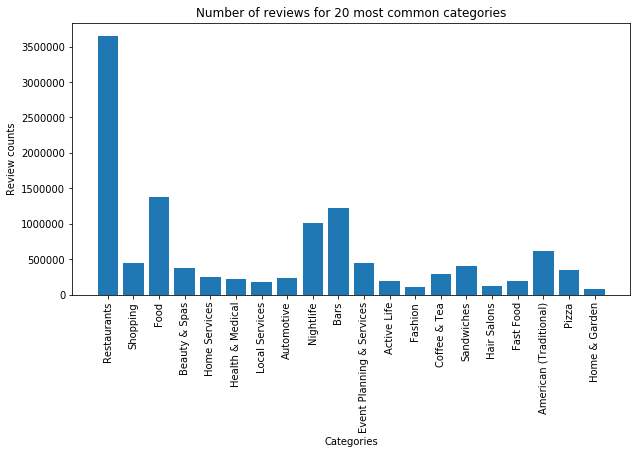

In [269]:
plt.bar(np.arange(top_n), top_categories_rc.values())
plt.xticks(np.arange(top_n), top_categories_rc.keys(), rotation='vertical')
plt.title('Number of reviews for ' + str(top_n) + ' most common categories')
plt.xlabel('Categories')
plt.ylabel('Review counts')
plt.savefig('Review count top categories.png',bbox_inches='tight')
plt.rcParams['figure.figsize']=(10,5)
plt.show()
plt.close()

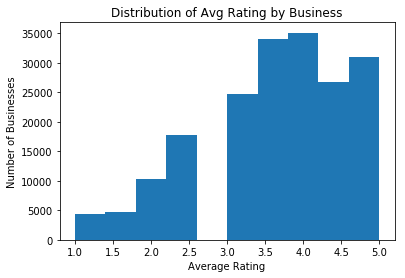

In [20]:
title = 'Distribution of Avg Rating by Business'
plt.hist(df.stars, range=(1,5))
plt.xlabel('Average Rating')
plt.ylabel('Number of Businesses')
plt.title(title)
plt.savefig(fname=title+'.png');

In [6]:
df.is_open.describe()

count    188593.000000
mean          0.830391
std           0.375290
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: is_open, dtype: float64

In [42]:
for col in df.columns:
    if 'attribute' in col:
        print(df[col].isnull().values.ravel().sum())

134412
174912
148555
179431
48202
81473
187936
180062
137230
188455
136570
179786
187682
187184
186712
140701
136925
123662
143170
85169
141016
179308
175919
145268
141060
134754
181839
140411
180480
188196
141110
188241
103702
127387
25786
176922
181749
144883
139567
188196


In [37]:
df.shape[0]

188593